**The data consists of the following columns:**

- instant: A unique row identifier
- dteday: The date on which the data was observed - in this case, the data was collected daily; so there's one row per date.
- season: A numerically encoded value indicating the season
    * 1:spring
    * 2:summer
    * 3:fall 
    * 4:winter
- yr: The year of the study in which the observation was made (the study took place over two years - year 0 represents 2011, and year 1 represents 2012)
- mnth: The calendar month in which the observation was made (1:January ... 12:December)
- holiday: A binary value indicating whether or not the observation was made on a public holiday)
- weekday: The day of the week on which the observation was made (0:Sunday ... 6:Saturday)
- workingday: A binary value indicating whether or not the day is a working day (not a weekend or holiday)
- weathersit: A categorical value indicating the weather situation
     * 1:clear
     * 2:mist/cloud
     * 3:light rain/snow
     * 4:heavy rain/hail/snow/fog
- temp: The temperature in celsius (normalized)
- atemp: The apparent ("feels-like") temperature in celsius (normalized)
- hum: The humidity level (normalized)
- windspeed: The windspeed (normalized)
- rentals: The number of bicycle rentals recorded.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
sns.set_style('whitegrid')

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.model_selection import train_test_split 

In [5]:
from sklearn.model_selection import GridSearchCV

In [6]:
from sklearn.linear_model import LinearRegression ,Lasso ,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor ,ExtraTreesRegressor
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

In [7]:
from sklearn.metrics import mean_squared_error as mse

In [8]:
# Mean squared logarithmic error regression loss.
from sklearn.metrics import mean_squared_log_error

# Returns :
# A non-negative floating point value (the best value is 0.0)

In [9]:
from sklearn.metrics import r2_score

In [10]:
import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [11]:
data = pd.read_csv('daily_bike_share.csv')
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


In [12]:
data.shape

(731, 14)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  rentals     731 non-null    int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 80.1+ KB


In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,731.0,366.000000,211.165812,1.000000,183.500000,366.000000,548.500000,731.000000
season,731.0,2.496580,1.110807,1.000000,2.000000,3.000000,3.000000,4.000000
yr,731.0,0.500684,0.500342,0.000000,0.000000,1.000000,1.000000,1.000000
mnth,731.0,6.519836,3.451913,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,731.0,0.028728,0.167155,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,731.0,2.997264,2.004787,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,731.0,0.683995,0.465233,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,731.0,1.395349,0.544894,1.000000,1.000000,1.000000,2.000000,3.000000
temp,731.0,0.495385,0.183051,0.059130,0.337083,0.498333,0.655417,0.861667
atemp,731.0,0.474354,0.162961,0.079070,0.337842,0.486733,0.608602,0.840896


In [15]:
data.describe(include='object').T

,count,unique,top,freq
dteday,731,731,8/10/2012,1


In [16]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
rentals       0
dtype: int64

## EDA

In [17]:
data = data.drop(['instant','dteday'] ,axis=1)

In [18]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


In [19]:
data[data.duplicated()]

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals


<h3 style='color:blue' align='center'> 'Month vs Rentals' </h3>

In [20]:
month_data = data.groupby('mnth')['rentals'].mean()
month_data

mnth
1      194.225806
2      262.508772
3      716.838710
4     1013.366667
5     1214.274194
6     1231.766667
7     1260.596774
8     1161.919355
9     1172.050000
10     963.870968
11     610.050000
12     349.887097
Name: rentals, dtype: float64

Text(0.5, 1.0, 'Month vs Rentals')

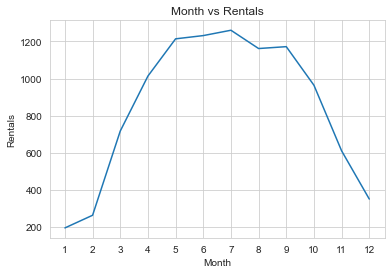

In [21]:
plt.plot(month_data.index ,month_data)

plt.xlabel('Month')
plt.ylabel('Rentals')

plt.xticks(np.arange(1,13))

plt.title('Month vs Rentals')

<h3 style='color:blue' align='center'> 'Year vs Rentals' </h3>

In [22]:
year_data = data.groupby('yr')['rentals'].mean()
year_data

yr
0     677.402740
1    1018.483607
Name: rentals, dtype: float64

Text(0.5, 1.0, 'Year vs Rentals')

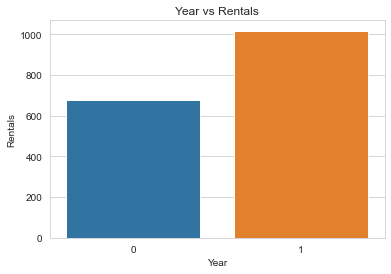

In [23]:
sns.barplot(year_data.index ,year_data)

plt.xlabel('Year')
plt.ylabel('Rentals')

plt.title('Year vs Rentals')

<h3 style='color:blue' align='center'> 'Seasons' </h3>

In [24]:
data['season'].value_counts()

3    188
2    184
1    181
4    178
Name: season, dtype: int64

In [25]:
season_data = data.groupby('season')['rentals'].mean()
season_data

season
1     334.928177
2    1106.097826
3    1202.611702
4     729.112360
Name: rentals, dtype: float64

Text(0.5, 1.0, 'Season vs Rentals')

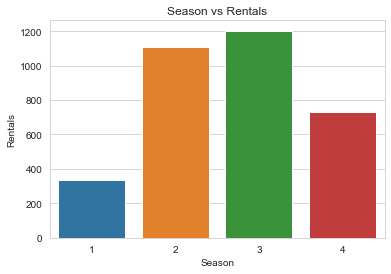

In [26]:
sns.barplot(season_data.index ,season_data)

plt.xlabel('Season')
plt.ylabel('Rentals')

plt.title('Season vs Rentals')

<h3 style='color:blue' align='center'> 'Workingday' </h3>

In [27]:
data['workingday'].value_counts()

1    500
0    231
Name: workingday, dtype: int64

In [28]:
workingday_data = data.groupby('workingday')['rentals'].mean()
workingday_data

workingday
0    1371.134199
1     606.570000
Name: rentals, dtype: float64

Text(0.5, 1.0, 'Workingday vs Rentals')

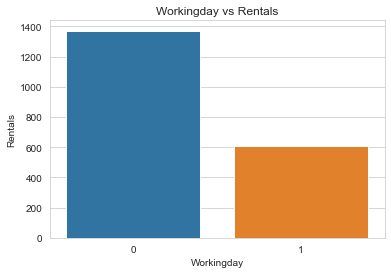

In [29]:
sns.barplot(workingday_data.index ,workingday_data)

plt.xlabel('Workingday')
plt.ylabel('Rentals')


plt.title('Workingday vs Rentals')

<h3 style='color:blue' align='center'> 'Weathersit' </h3>

In [30]:
data['weathersit'].value_counts()

1    463
2    247
3     21
Name: weathersit, dtype: int64

In [31]:
weathersit_data = data.groupby('weathersit')['rentals'].mean()
weathersit_data

weathersit
1    964.030238
2    687.352227
3    185.476190
Name: rentals, dtype: float64

Text(0.5, 1.0, 'Weathersit vs Rentals')

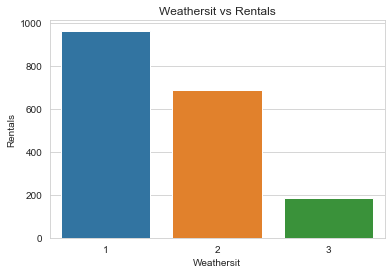

In [32]:
sns.barplot(weathersit_data.index ,weathersit_data)

plt.xlabel('Weathersit')
plt.ylabel('Rentals')


plt.title('Weathersit vs Rentals')

In [33]:
data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'rentals'],
      dtype='object')

<h3 style='color:blue' align='center'> 'Continous Variable' </h3>

In [34]:
continous_var = ['temp', 'atemp', 'hum', 'windspeed']

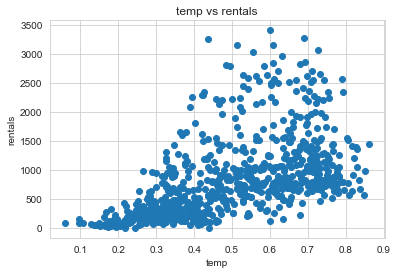

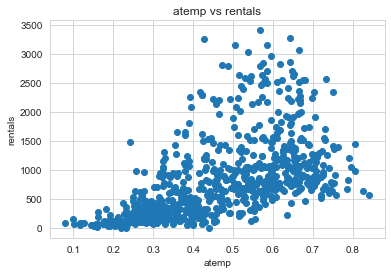

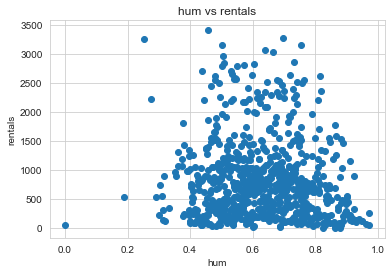

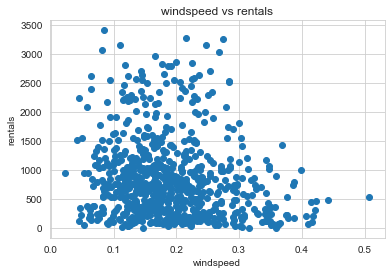

In [35]:
for feat in continous_var:
    plt.scatter(data[feat] ,data['rentals'])
    plt.xlabel(feat)
    plt.ylabel('rentals')
    plt.title(feat+' vs rentals')
    plt.show()

<h3 style='color:blue' align='center'> 'Discrete Variable' </h3>

In [36]:
discrete_var = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday','weathersit']

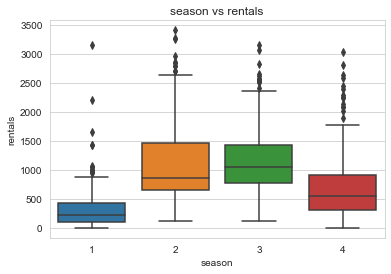

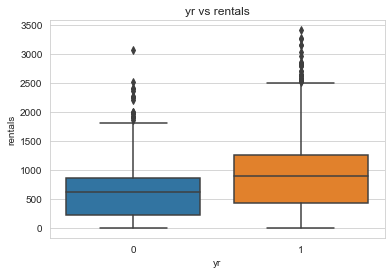

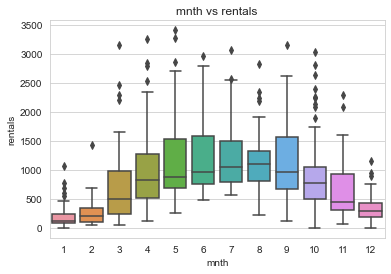

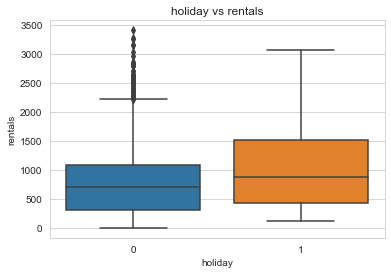

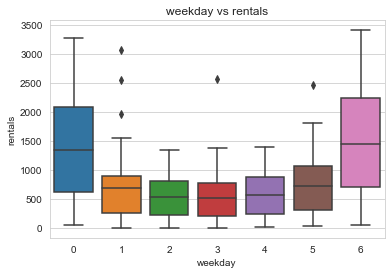

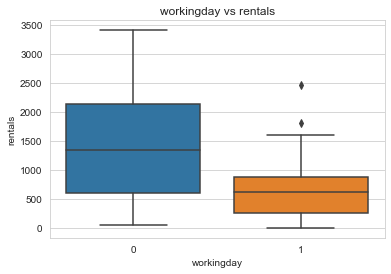

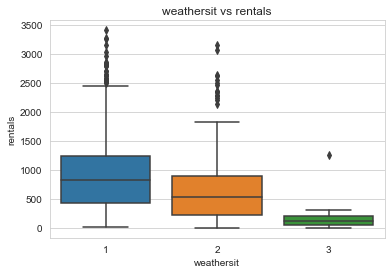

In [37]:
for feat in discrete_var:
    
    sns.boxplot(data[feat] ,data['rentals'])
    plt.xlabel(feat)
    plt.ylabel('rentals')
    plt.title(feat+' vs rentals')
    plt.show()

## Feature Eng

<AxesSubplot:>

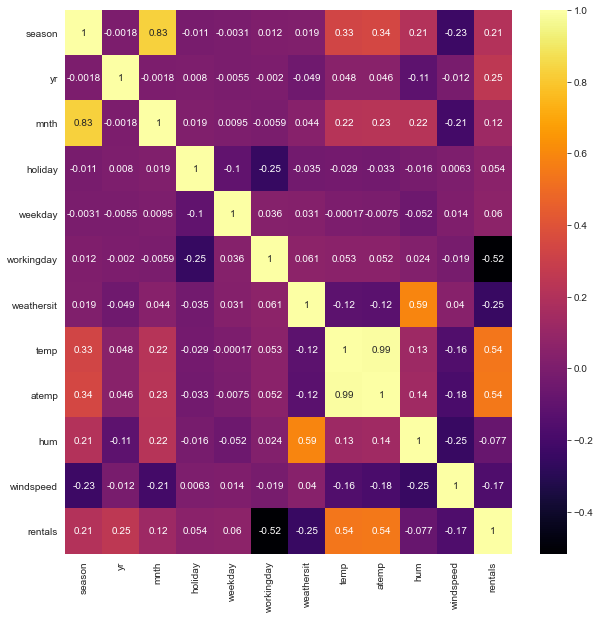

In [38]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr() ,annot=True ,cmap='inferno')

In [39]:
X = data.drop(['rentals','mnth','atemp','hum'] ,axis=1)
y = data['rentals']

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

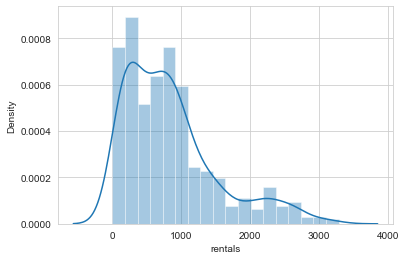

In [41]:
sns.distplot(y_train);

## Model Preperation

<h3 style='color:red' align='center'> 'Linear Regression' </h3>

In [42]:
lr = LinearRegression()

In [43]:
lr.fit(X_train ,y_train)

LinearRegression()

In [44]:
lr_predict = lr.predict(X_test)

In [45]:
lr_rmse = np.sqrt(mse(y_test,lr_predict))
lr_rmse

425.8931606874399

In [46]:
lr_score = lr.score(X_test ,y_test)
lr_score

0.6567293557176964

<h3 style='color:red' align='center'> 'Lasso Regression' </h3>

In [47]:
lasso_lr = Lasso(max_iter=1e6 ,random_state=0)

In [48]:
params = {
            'alpha' : [0.0001 ,0.0005 ,0.001 ,0.005 ,0.01 ,0.1 ,1 ,10 ,20 ,100]
         } 

In [49]:
lasso_lr = GridSearchCV(lasso_lr ,params ,cv=3)

In [50]:
lasso_lr.fit(X_train ,y_train)

GridSearchCV(cv=3, estimator=Lasso(max_iter=1000000.0, random_state=0),
             param_grid={'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1, 1,
                                   10, 20, 100]})

In [51]:
lasso_lr.best_params_

{'alpha': 0.0001}

In [52]:
lasso_lr = Lasso( alpha=0.0001 ,max_iter=1e6 )

In [53]:
lasso_lr.fit(X_train ,y_train)

Lasso(alpha=0.0001, max_iter=1000000.0)

In [54]:
lasso_lr_pred = lasso_lr.predict(X_test)

In [55]:
lasso_lr_rmse = np.sqrt(mse(y_test,lasso_lr_pred))
lasso_lr_rmse

425.8932001578472

In [56]:
lasso_lr_score = lasso_lr.score(X_test ,y_test)
lasso_lr_score

0.6567292920912564

<h3 style='color:red' align='center'> 'Ridge Regression' </h3>

In [57]:
ridge_lr = Ridge(random_state=0)

In [58]:
params = {
            'alpha' : [0.0001 ,0.0005 ,0.001 ,0.005 ,0.01 ,0.1 ,1 ,10 ,20 ,100]
         } 

In [59]:
ridge_lr = GridSearchCV(ridge_lr ,params ,cv=3)

In [60]:
ridge_lr.fit(X_train ,y_train)

GridSearchCV(cv=3, estimator=Ridge(random_state=0),
             param_grid={'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1, 1,
                                   10, 20, 100]})

In [61]:
ridge_lr.best_params_

{'alpha': 0.1}

In [62]:
ridge_lr = Ridge( alpha=0.1 )

In [63]:
ridge_lr.fit(X_train ,y_train)

Ridge(alpha=0.1)

In [64]:
ridge_lr_pred = ridge_lr.predict(X_test)

In [65]:
ridge_lr_rmse = np.sqrt(mse(y_test,ridge_lr_pred))
ridge_lr_rmse

425.9006741307129

In [66]:
ridge_lr_score = ridge_lr.score(X_test ,y_test)
ridge_lr_score

0.6567172439136042

<h3 style='color:red' align='center'> 'Decision Tree' </h3>

In [67]:
dt = DecisionTreeRegressor(random_state=0)

In [68]:
params = {
            'max_depth'        : np.arange(1,50,2) ,
            'min_samples_leaf' : np.arange(2,15)
          }

In [69]:
dt = GridSearchCV(dt,params,cv=3)

In [70]:
dt.fit(X_train ,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49]),
                         'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [71]:
dt.best_params_

{'max_depth': 7, 'min_samples_leaf': 14}

In [72]:
dt = DecisionTreeRegressor(
                            max_depth = 7 , 
                            min_samples_leaf = 14
                          )

In [73]:
dt.fit(X_train ,y_train)

DecisionTreeRegressor(max_depth=7, min_samples_leaf=14)

In [74]:
dt_pred = dt.predict(X_test)

In [75]:
# dt_msle = mean_squared_log_error(y_test,dt_pred)
# dt_msle
# dt_rmsle = np.sqrt(dt_msle)
# dt_rmsle

In [76]:
dt_rmse = np.sqrt(mse(y_test,dt_pred))
dt_rmse

343.992682750053

In [77]:
dt_score = dt.score(X_test ,y_test)
dt_score

0.7760589333457389

<h3 style='color:red' align='center'> 'Random Forest' </h3>

In [78]:
rf = RandomForestRegressor(random_state=0)

In [79]:
params = {
           'n_estimators'     : np.arange(25,150,25)  ,
           'max_depth'        : np.arange(1,11,2)     ,
           'min_samples_leaf' : np.arange(2,15,3)
         }

In [80]:
rf = GridSearchCV(rf,params,cv=3)

In [81]:
rf.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': array([1, 3, 5, 7, 9]),
                         'min_samples_leaf': array([ 2,  5,  8, 11, 14]),
                         'n_estimators': array([ 25,  50,  75, 100, 125])})

In [82]:
rf.best_params_

{'max_depth': 7, 'min_samples_leaf': 2, 'n_estimators': 100}

In [83]:
rf = RandomForestRegressor(
                            max_depth = 7 ,
                            min_samples_leaf = 2 ,
                            n_estimators = 100
                          )

In [84]:
rf.fit(X_train ,y_train)

RandomForestRegressor(max_depth=7, min_samples_leaf=2)

In [85]:
rf_pred = rf.predict(X_test)

In [86]:
# rf_msle = mean_squared_log_error(y_test,rf_pred)
# rf_msle
# rf_rmsle = np.sqrt(rf_msle)
# rf_rmsle

In [87]:
rf_rmse = np.sqrt(mse(y_test,rf_pred))
rf_rmse

307.1412121171034

In [88]:
rf_score = rf.score(X_test ,y_test)
rf_score

0.8214698700683046

<h3 style='color:red' align='center'> 'Extra Trees' </h3>

In [89]:
etr = ExtraTreesRegressor(n_estimators=30)

In [90]:
etr.fit(X_train,y_train)

ExtraTreesRegressor(n_estimators=30)

In [91]:
etr_pred = etr.predict(X_test)

In [92]:
etr_score = etr.score(X_test ,y_test)
etr_score

0.8262460406164541

In [93]:
etr_rmse = np.sqrt(mse(y_test ,etr_pred))
etr_rmse

303.0049254842648

<h3 style='color:red' align='center'> 'Cat Boost' </h3>

In [94]:
cbr = CatBoostRegressor(
                         n_estimators = 200,
                         loss_function = 'MAE',
                         eval_metric = 'RMSE'
                        )

In [95]:
cbr.fit(X_train, y_train);

0:	learn: 672.6205247	total: 136ms	remaining: 27.1s
1:	learn: 657.9064410	total: 137ms	remaining: 13.6s
2:	learn: 642.6070117	total: 139ms	remaining: 9.11s
3:	learn: 630.3502304	total: 140ms	remaining: 6.87s
4:	learn: 616.3947533	total: 142ms	remaining: 5.53s
5:	learn: 603.9195265	total: 143ms	remaining: 4.62s
6:	learn: 590.1991030	total: 144ms	remaining: 3.97s
7:	learn: 576.6997554	total: 145ms	remaining: 3.48s
8:	learn: 563.8555227	total: 146ms	remaining: 3.11s
9:	learn: 552.0939450	total: 147ms	remaining: 2.8s
10:	learn: 540.3815880	total: 149ms	remaining: 2.55s
11:	learn: 530.2737456	total: 150ms	remaining: 2.35s
12:	learn: 522.8489060	total: 151ms	remaining: 2.17s
13:	learn: 511.9389241	total: 152ms	remaining: 2.02s
14:	learn: 501.0424175	total: 153ms	remaining: 1.89s
15:	learn: 491.1528289	total: 154ms	remaining: 1.77s
16:	learn: 483.7262175	total: 155ms	remaining: 1.67s
17:	learn: 478.8660146	total: 156ms	remaining: 1.57s
18:	learn: 470.5550579	total: 157ms	remaining: 1.49s
19:	

In [96]:
cbr_pred = cbr.predict(X_test)

In [97]:
cbr_score = cbr.score(X_test,y_test)
cbr_score

0.8611809397560048

In [98]:
cbr_rmse = np.sqrt(mse(y_test ,cbr_pred))
cbr_rmse

270.83630702024385

<h3 style='color:red' align='center'> 'XG Boost' </h3>

In [99]:
xgb = XGBRegressor()

In [100]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [101]:
xgb_pred = xgb.predict(X_test)

In [102]:
xgb_score = xgb.score(X_test ,y_test)
xgb_score

0.8272565257154403

In [103]:
xgb_rmse = np.sqrt(mse(y_test ,xgb_pred))
xgb_rmse

302.12256164917505

<h3 style='color:red' align='center'> 'KNN' </h3>

In [104]:
knn = KNeighborsRegressor(n_neighbors=10)

In [105]:
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=10)

In [106]:
knn_pred = knn.predict(X_test)

In [107]:
knn_score = knn.score(X_test ,y_test)
knn_score

0.7531593429903556

In [108]:
knn_rmse = np.sqrt(mse(y_test ,knn_pred))
knn_rmse

361.15254545473636

## Conclusion

In [109]:
model = pd.DataFrame({
                       'Model' : ['Linear Regression' ,'Lasso' ,'Ridge' ,'Decision Tree' ,'Random Forest' ,'Extra Tree' ,'CatBoost' ,'XG Boost' ,'KNN'],
                       'RMSE'  : [lr_rmse ,lasso_lr_rmse ,ridge_lr_rmse ,dt_rmse ,rf_rmse ,etr_rmse ,cbr_rmse ,xgb_rmse ,knn_rmse] ,
                       'Score' : [lr_score ,lasso_lr_score ,ridge_lr_score ,dt_score ,rf_score ,etr_score ,cbr_score ,xgb_score ,knn_score]
                     })

model.set_index('Model')

,RMSE,Score
Model,,
Linear Regression,425.893161,0.656729
Lasso,425.893200,0.656729
Ridge,425.900674,0.656717
Decision Tree,343.992683,0.776059
Random Forest,307.141212,0.821470
Extra Tree,303.004925,0.826246
CatBoost,270.836307,0.861181
XG Boost,302.122562,0.827257
KNN,361.152545,0.753159


In [110]:
model = model.sort_values(by='Score' ,ascending=False)
model

,Model,RMSE,Score
6,CatBoost,270.836307,0.861181
7,XG Boost,302.122562,0.827257
5,Extra Tree,303.004925,0.826246
4,Random Forest,307.141212,0.821470
3,Decision Tree,343.992683,0.776059
8,KNN,361.152545,0.753159
0,Linear Regression,425.893161,0.656729
1,Lasso,425.893200,0.656729
2,Ridge,425.900674,0.656717
